# Confidence intervals for normal means

## Summary

## Scenario

## Method

### Setup the notebook

In [1]:
# import the packages
from src import load
from scipy.stats import probplot
from statsmodels.stats.weightstats import CompareMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# set the Seaborn theme
sns.set_theme()

### Load the data

In [3]:
# import the sample
skulls = load.skulls()
# declare local vars
etr = skulls["Etruscans"].dropna()
ita = skulls["Italians"].dropna()

### Visualise the data

In [4]:
# unpivot skulls so it is long format
mskulls = skulls.melt(
            value_vars=["Etruscans", "Italians"],
            var_name="skull",
            value_name="size")
mskulls.dropna(inplace=True)

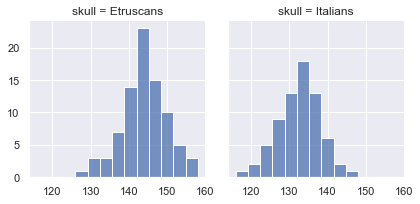

In [5]:
# plot as histogram
g = sns.FacetGrid(mskulls, col="skull")
g.map_dataframe(sns.histplot, x="size", bins=10)
plt.show()

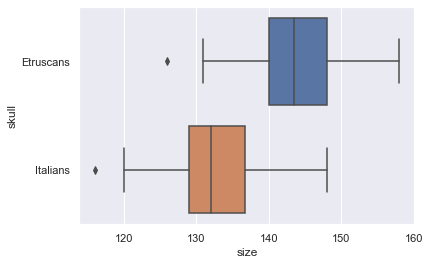

In [6]:
# plot as boxplots
sns.boxplot(data=mskulls, x="size", y="skull")
plt.show()

### Return the $t$-interval for the difference

In [7]:
# declare object
diff = CompareMeans.from_data(data1=etr, data2=ita)

#### Check assumption of normality

Both plots show the points closely following a straight line, so the assumption of normality is justified.

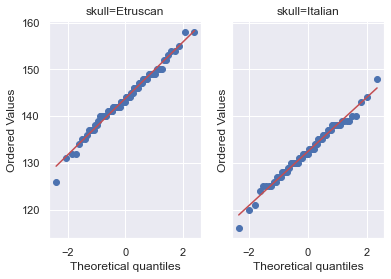

In [15]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
probplot(x=etr, plot=ax1)
probplot(x=ita, plot=ax2)
ax1.set(title="skull=Etruscan")
ax2.set(title="skull=Italian")
plt.show()

#### Check for equal variances

The ratio is less than 3, so we can assume the underlying population variances are equal.

In [9]:
if etr.var() > ita.var():
    print(etr.var()/ita.var() < 3)
else:
    print(ita.var()/etr.var() < 3)

True


The pooled sample variances $S_{P}^{2}$ is given by

In [10]:
diff.std_meandiff_pooledvar

0.9501987648612075

#### Calculate the $t$-interval

In [11]:
# get t-interval
diff.tconfint_diff(alpha=0.05)

(9.453650451007142, 13.208254310897594)